# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [2]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [3]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import classification_report

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [4]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

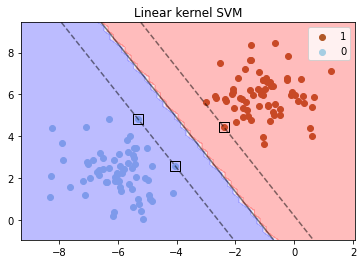

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

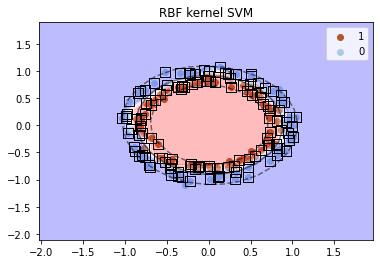

In [6]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

# build the model
model = svm.SVC(kernel='rbf', gamma=0.5, random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('RBF kernel SVM')
plt.show()



<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>
One can use RBF when the data not linearly separable in its original space. Using the RBF kernel, the data can be mapped to a higher dimmension space, where the data is linearly seperable. Thus in the previous case, we have circular data, which cannot be seperated with linear lines. RBF does a good job however, at finding a good decision boundary. Besides this, RBF is a good option to use when you have a high-dimensional feature space.

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>
Whether to normalize the data, depends on the type of similarity/distance function one plans to use. With some kernels, RBF for example, Euclidean distance is used. Then if the data is not normalized, SVM could find one feature more important than the other. Take for example a set of data with two featuers, one feature has a range from 0 to 1, while the other feature ranges from 0 to 10. Relatively small changes for the second feature have a similar impact as relatively larger changes in the first dimension. Thus normalization or scaling, is often prefered when working with SVM.

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

# Change the continuous response to binary
drug_response.loc[drug_response['YM155'] <= 0, 'YM155'] = 0 # Sensitive
drug_response.loc[drug_response['YM155'] > 0, 'YM155'] = 1 # Resistant

X = gene_expression.values
Y = drug_response['YM155'].astype('bool').values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

model.fit(X_train, Y_train)
precision = precision_score(Y_test, model.predict(X_test))
print("\n Precision with standard hyperparameters: ", precision)
print("\n Classification report for model with standard hyperparamters: \n", classification_report(Y_test, model.predict(X_test)))

print('-' * 70)

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

model = svm.SVC(kernel='linear', random_state=33)

# Custom precision scorrer is made to incorporate zero_division=0 (dataset is inbalanced so there are cases where there are no true positives)
precision_scorer = make_scorer(precision_score, zero_division=0)

grid = GridSearchCV(model, param_grid, verbose = 1, scoring = precision_scorer, error_score='raise')
grid.fit(X_train, Y_train)

# print best parameter after tuning
print("\n The best grid hyperparamters based on accuracy are: \n", grid.best_params_)

grid_predictions = grid.predict(X_test) 

# Calculate precision:
grid_precision = precision_score(Y_test, grid_predictions)
print("\n Precision with grid search hyperparamters: ", grid_precision)

# print classification report 
print("\n Classification report for model with grid search: \n", classification_report(Y_test, grid_predictions)) 


NameError: name 'precision_score' is not defined

## Analysis of SVM results
We first plot the results of the training of a SVM model with the "default" parameters. From the this classification report we can already see that the data is poorly distributed (inbalanced dataset), as the training set includes 43 False instances (sensitive response of cell-line), while it includes only 6 True instances (resistant response of cell-line). This is a problem for training, because training on the accuracy will already give a high accuracy if all instances are predicted as False (sensitive) 43+0/43+6 = 0.88. This means the accuracy has a bias towards the majority class. To avoid this problem during training we will use the precision metric as the scoring parameter.

A grid search analysis concludes that the the best performing order of magnitude on this dataset using SVM are: C (error term) = 10, gamma (kernel coefficient) = 0.001 and the best kernel was rbf (radial basis function). We can again see from the classification report that the precision for the False instances (sensitive) is much better than for the True cases. The overal precision is unfortunaly still bad, although has improved slightly.

## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.98      0.92        43
        True       0.00      0.00      0.00         6

    accuracy                           0.86        49
   macro avg       0.44      0.49      0.46        49
weighted avg       0.77      0.86      0.81        49



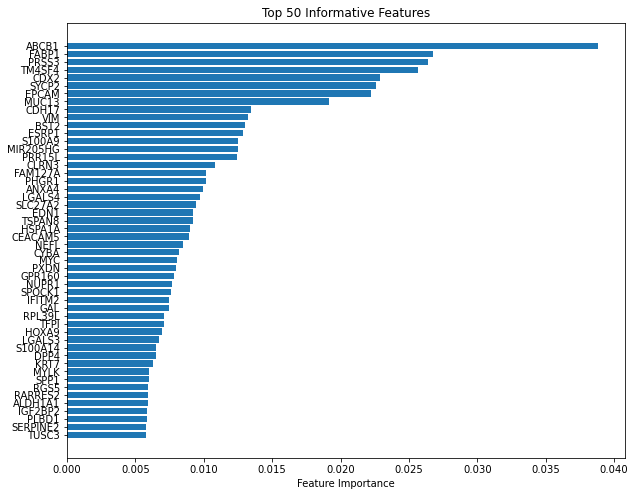

Fitting 5 folds for each of 108 candidates, totalling 540 fits

 The best grid hyperparameters for Random Forest based on precision are: 
 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

 Precision with grid search hyperparameters for Random Forest:  0.0

 Classification report for Random Forest with grid search: 
               precision    recall  f1-score   support

       False       0.88      0.98      0.92        43
        True       0.00      0.00      0.00         6

    accuracy                           0.86        49
   macro avg       0.44      0.49      0.46        49
weighted avg       0.77      0.86      0.81        49

----------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits

 The best grid hyperparameters for SVM based on precision are: 
 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

 Precision with grid search hyperparameters for SVM:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, classification_report, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the data
gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

# Change the continuous response to binary
drug_response.loc[drug_response['YM155'] <= 0, 'YM155'] = 0 # Sensitive
drug_response.loc[drug_response['YM155'] > 0, 'YM155'] = 1 # Resistant

X = gene_expression.values
Y = drug_response['YM155'].astype('bool').values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

# Define the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, oob_score=True, bootstrap=True)

# Train the Random Forest classifier
rf_model.fit(X_train, Y_train)

# Evaluate the Random Forest classifier
rf_y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(Y_test, rf_y_pred))

# Perform feature importance analysis
feature_importances = rf_model.feature_importances_
features = gene_expression.columns
top_indices = feature_importances.argsort()[-50:][::-1]  # Get indices of top 50 features

# Visualize the top 50 informative features
plt.figure(figsize=(10, 8))
plt.barh(range(50), feature_importances[top_indices], align='center')
plt.yticks(range(50), [features[i] for i in top_indices])
plt.xlabel('Feature Importance')
plt.title('Top 50 Informative Features')
plt.gca().invert_yaxis()
plt.show()

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

# Custom precision scorer
precision_scorer = make_scorer(precision_score, zero_division=0)

# Grid search for Random Forest
grid_rf = GridSearchCV(rf_model, param_grid_rf, verbose=1, scoring=precision_scorer, error_score='raise')
grid_rf.fit(X_train, Y_train)

# Print best parameters after tuning
print("\n The best grid hyperparameters for Random Forest based on precision are: \n", grid_rf.best_params_)

# Predictions with best parameters
grid_rf_predictions = grid_rf.predict(X_test)

# Calculate precision
grid_rf_precision = precision_score(Y_test, grid_rf_predictions)
print("\n Precision with grid search hyperparameters for Random Forest: ", grid_rf_precision)

# Print classification report
print("\n Classification report for Random Forest with grid search: \n", classification_report(Y_test, grid_rf_predictions))

# Compare with SVM
print('-' * 70)

from sklearn import svm

# Define parameter grid for SVM
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

model_svm = svm.SVC(kernel='linear', random_state=33)

# Grid search for SVM
grid_svm = GridSearchCV(model_svm, param_grid_svm, verbose=1, scoring=precision_scorer, error_score='raise')
grid_svm.fit(X_train, Y_train)

# Print best parameters after tuning
print("\n The best grid hyperparameters for SVM based on precision are: \n", grid_svm.best_params_)

# Predictions with best parameters
grid_svm_predictions = grid_svm.predict(X_test)

# Calculate precision
grid_svm_precision = precision_score(Y_test, grid_svm_predictions)
print("\n Precision with grid search hyperparameters for SVM: ", grid_svm_precision)

# Print classification report
print("\n Classification report for SVM with grid search: \n", classification_report(Y_test, grid_svm_predictions))

## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>